In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

In [24]:
F = open("10.conv.weight_save.txt",'r')
inArray = F.read()
inArray = inArray.split(",")
a = np.zeros([len(inArray)/2,2])
i = 0
for i in range(len(inArray)):
    inArray[i] = inArray[i].strip()
    inArray[i] = inArray[i].strip('(')
    inArray[i] = inArray[i].strip(')')
    inArray[i] = float(inArray[i])
    a[i/2,i%2] = inArray[i]
print(a.shape)

(701, 2)


In [45]:
a =  np.load("0.weight_save.npy")
print(a.shape)

(11251, 2)


In [47]:
shape = [(192, 3, 5, 5),(160, 192, 1, 1),(96, 160, 1, 1),(192, 96, 5, 5),(192, 192, 1, 1),(192, 192, 1, 1),(192, 192, 3, 3),(192, 192, 1, 1),(10, 192, 1, 1)]
b = np.zeros(shape[0])
size0 = b.shape[0]
size1 = b.shape[1]
size2 = b.shape[2]
size3 = b.shape[3]
for t in range(len(a)):
    i = a[t][0]
    b[int(i/size1/size2/size3)][int(i/size2/size3%size1)][int(i/size3%size2)][int(i%size3)] = a[t][1]

In [48]:
c = b.swapaxes(1,3)
c = (c>0.01) * 1.0
TheMap = np.zeros([size2,size3])
for i in range(size0):
    for j in range(size2):
        for k in range(size3):
            for l in range(size1):
                TheMap[j][k] += c[i][j][k][l]
print TheMap

[[447. 451. 445. 458. 442.]
 [445. 440. 448. 450. 451.]
 [446. 451. 453. 447. 457.]
 [451. 454. 455. 457. 454.]
 [444. 449. 454. 453. 449.]]


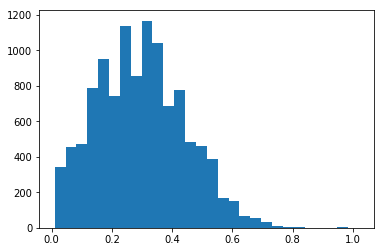

In [53]:
n, bins, patches = plt.hist(a[:,1],int(len(a)/400),histtype='bar')
#n, bins, patches = plt.hist(b.reshape(-1),int(len(b.reshape(-1))/300),histtype='bar')

In [6]:
print(b.mean())
print(b.var())

0.20903841145833446
0.015307975087059897


[0.   0.   0.03 ... 0.   0.05 0.22]
